In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('Diwali.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [6]:
df.shape

(11251, 15)

In [7]:
df1=df.drop(columns=['Status','unnamed1'],axis=1)

In [8]:
df1.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [9]:
df1.shape

(11251, 13)

In [10]:
df1.fillna(df['Amount'].mean(),inplace=True)

In [11]:
df1.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [12]:
df2=df1.copy()

In [13]:
df2.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5219.569870
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Distribution  of categories 

<Axes: xlabel='Age'>

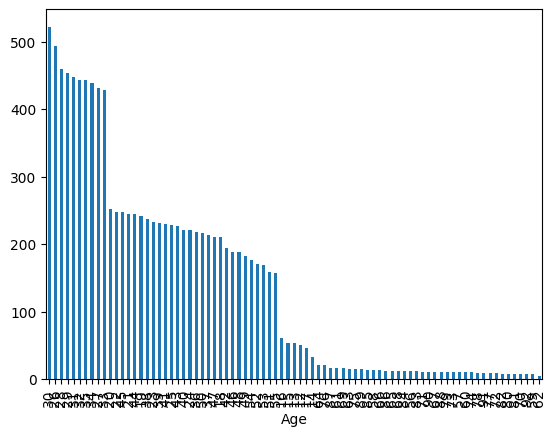

In [14]:
df2['Age'].value_counts().plot(kind='bar')

<Axes: xlabel='Product_Category'>

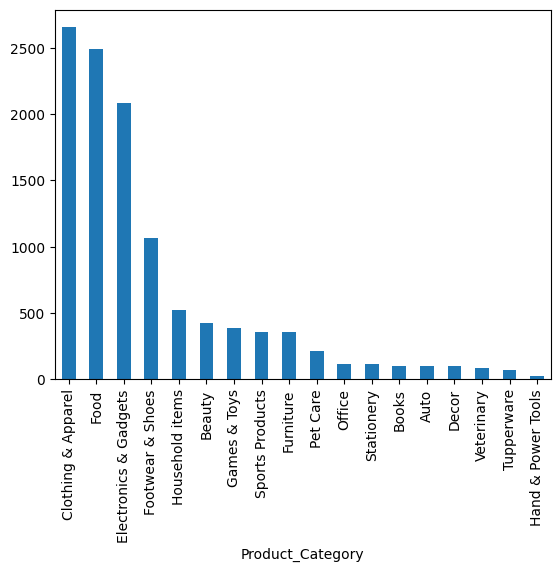

In [15]:
df2['Product_Category'].value_counts().plot(kind='bar')

<Axes: xlabel='Age Group'>

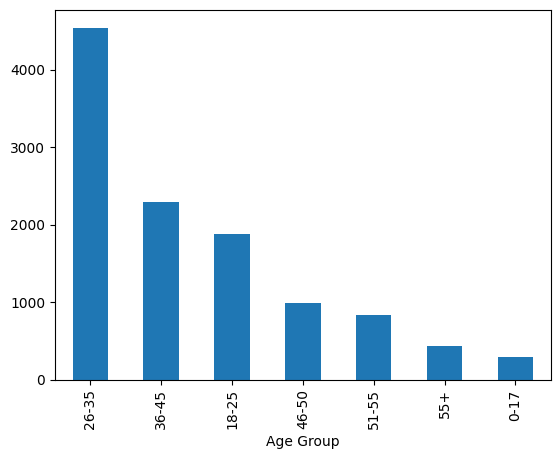

In [16]:
df['Age Group'].value_counts().plot(kind='bar')

# customer life time value estimation

In [17]:
df2.groupby('Cust_name')['Amount'].sum().sort_values(ascending=False).head(10)

Cust_name
Vishakha     382782.0
Sudevi       287142.0
Vasudev      281034.0
Neola        275234.0
Alejandro    272517.0
Aastha       266961.0
Shreyshi     265603.0
Hazel        242343.0
Akshat       241349.0
Gopal        239147.0
Name: Amount, dtype: float64

In [18]:
df2.groupby('Cust_name')['Amount'].sum().sort_values(ascending=True).head(10)

Cust_name
Madan Mohan     7420.0
Nicole          8432.0
Laal            9563.0
Michael        12965.0
Jayanti        14416.0
Wendt          16152.0
Preksha        16594.0
Carmichael     16599.0
Matthew        17206.0
Gerbode        17242.0
Name: Amount, dtype: float64

# Customer Demographic Analysis

<Axes: xlabel='Age Group'>

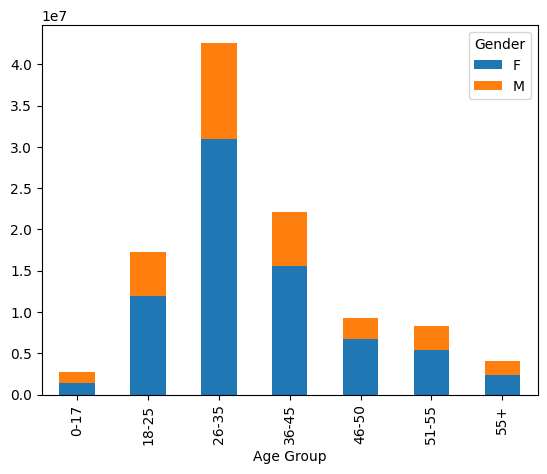

In [19]:
df2.pivot_table(values='Amount',index='Age Group',columns='Gender',aggfunc='sum').plot(kind='bar',stacked=True)

# Cross-tabulation

<Axes: xlabel='Gender'>

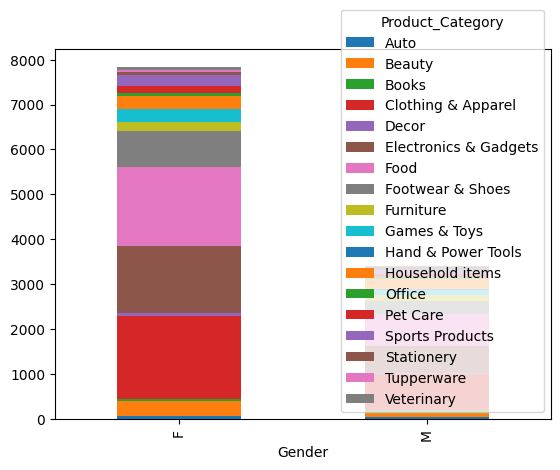

In [20]:
pd.crosstab(df['Gender'], df['Product_Category']).plot(kind='bar', stacked=True)

<Axes: xlabel='State'>

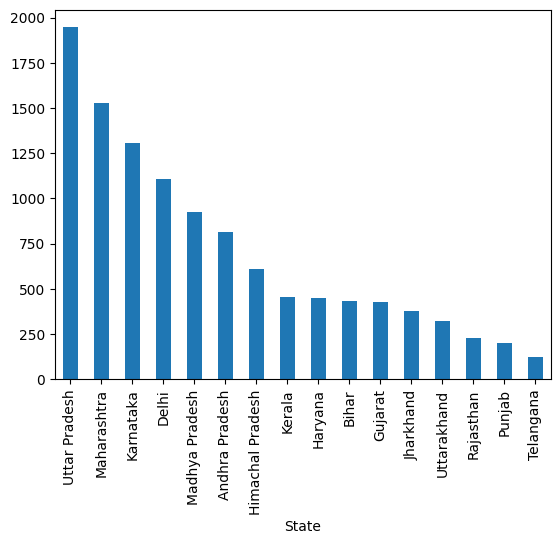

In [21]:
df2['State'].value_counts().plot(kind='bar')

In [22]:
df_corr=df2[['Age','Amount','Orders']]

<Axes: >

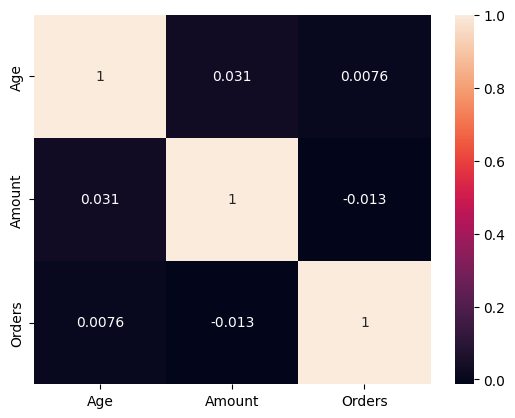

In [23]:
df_corr.corr()
sns.heatmap(df_corr.corr(),annot=True)

# EDA 

In [24]:
df2.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

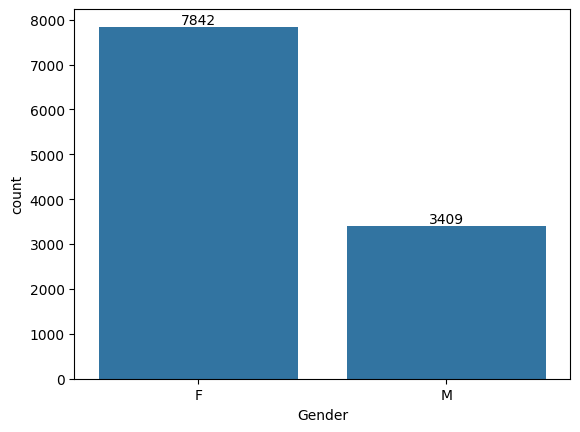

In [25]:
ax=sns.countplot(x='Gender',data=df2)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

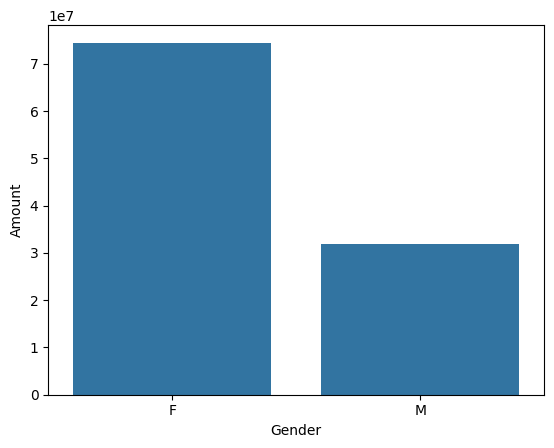

In [26]:
sales_gen=df2.groupby('Gender')['Amount'].sum().sort_values(ascending=False)
sales_gen_df = sales_gen.reset_index()
sns.barplot(x='Gender',y='Amount',data = sales_gen_df)

<Axes: xlabel='Age Group', ylabel='count'>

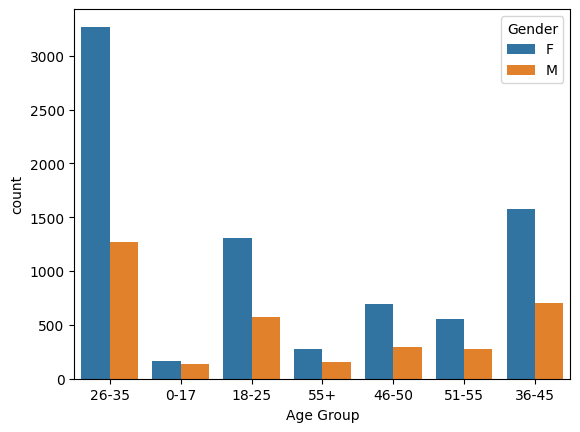

In [27]:
sns.countplot(data = df2,x='Age Group',hue='Gender')

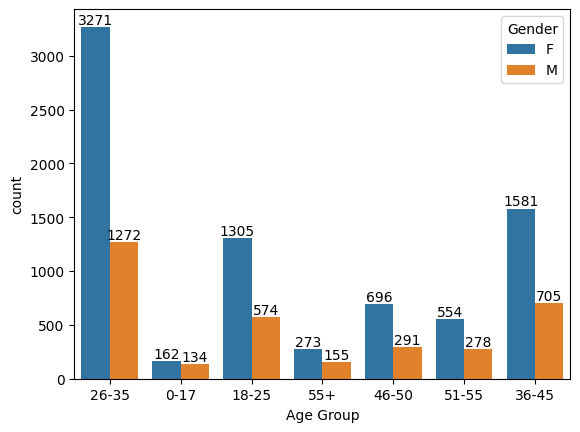

In [28]:
ax=sns.countplot(data=df2,x='Age Group',hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

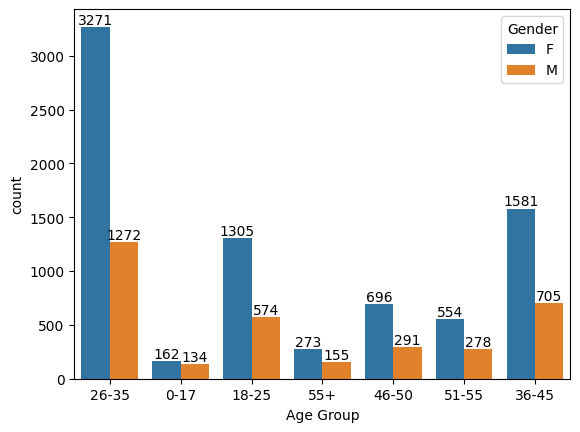

In [29]:
ax=sns.countplot(data=df2,x='Age Group',hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

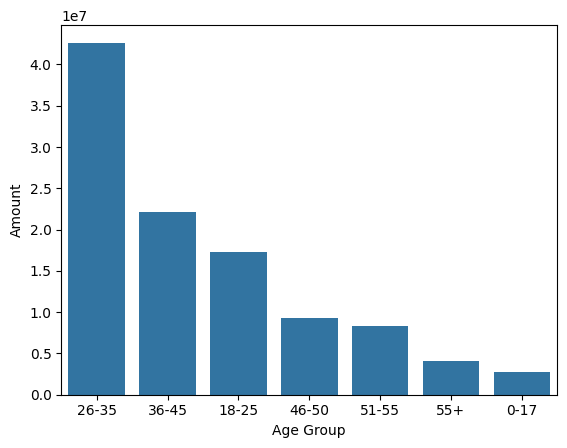

In [30]:
# total amount vs age group

sales_age=df2.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data= sales_age)

C:\Users\manee\AppData\Local\Temp\ipykernel_10756\3662595591.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_amount,x='State',y='Amount',palette='Set2')


<Axes: xlabel='State', ylabel='Amount'>

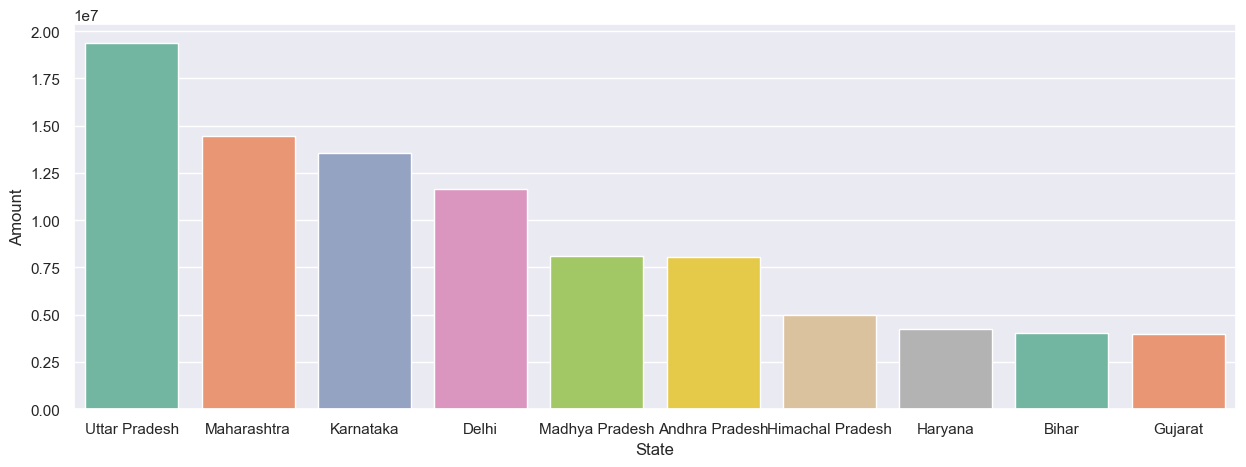

In [56]:
# total amount by state

state_amount=df2.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=state_amount,x='State',y='Amount',palette='Set2')

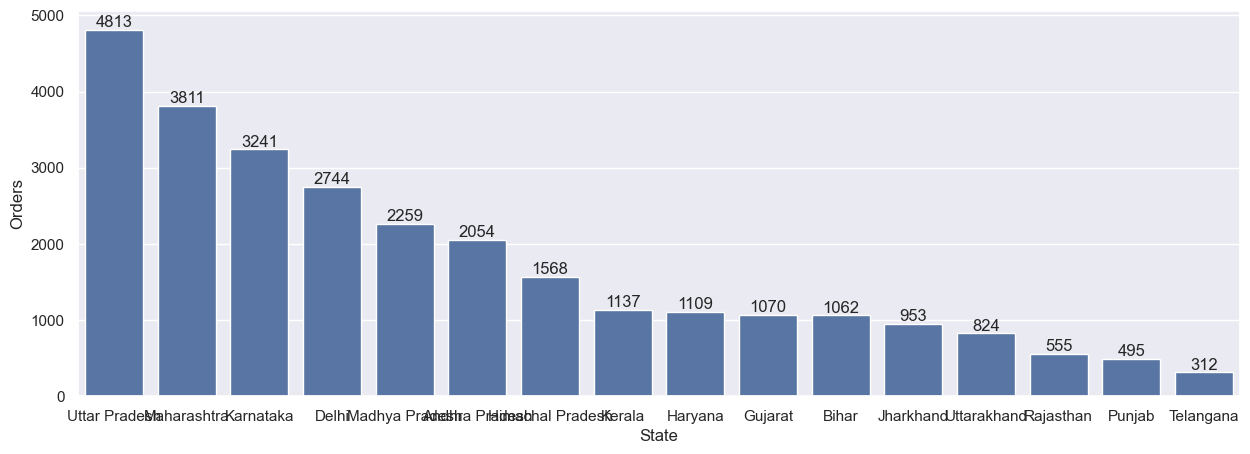

In [32]:
# total orders with state
state_orders = df2.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
sns.set(rc={'figure.figsize': (15, 5)})
ax = sns.barplot(data=state_orders, x='State', y='Orders')
for bars in ax.containers:
    ax.bar_label(bars, label_type='edge')

C:\Users\manee\AppData\Local\Temp\ipykernel_10756\1556085120.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Marital_Status',data=df2,palette='Set2')


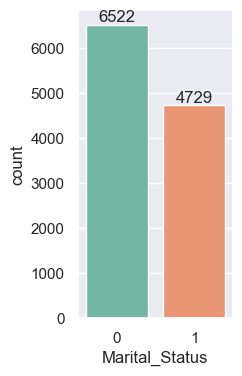

In [49]:
# marital status

ax=sns.countplot(x='Marital_Status',data=df2,palette='Set2')
sns.set(rc={'figure.figsize':(6,4)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

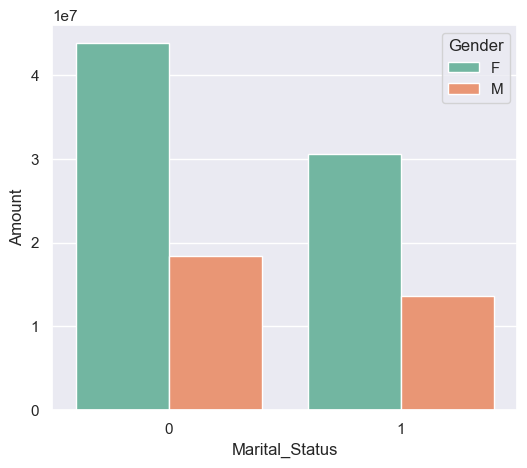

In [50]:
sales= df2.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=sales,x='Marital_Status',y='Amount',hue='Gender',palette='Set2')

# Occupations

C:\Users\manee\AppData\Local\Temp\ipykernel_10756\3239761384.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x = 'Occupation',data = df2 , palette='Set2')


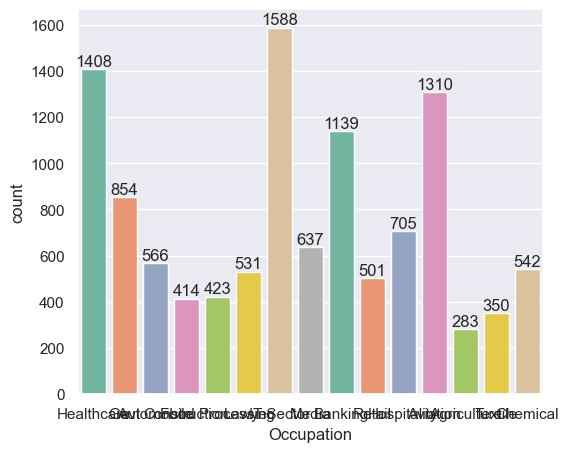

In [51]:
ax=sns.countplot(x = 'Occupation',data = df2 , palette='Set2')
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\manee\AppData\Local\Temp\ipykernel_10756\2156534170.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_occu,x='Occupation',y='Amount',palette='Set2')


<Axes: xlabel='Occupation', ylabel='Amount'>

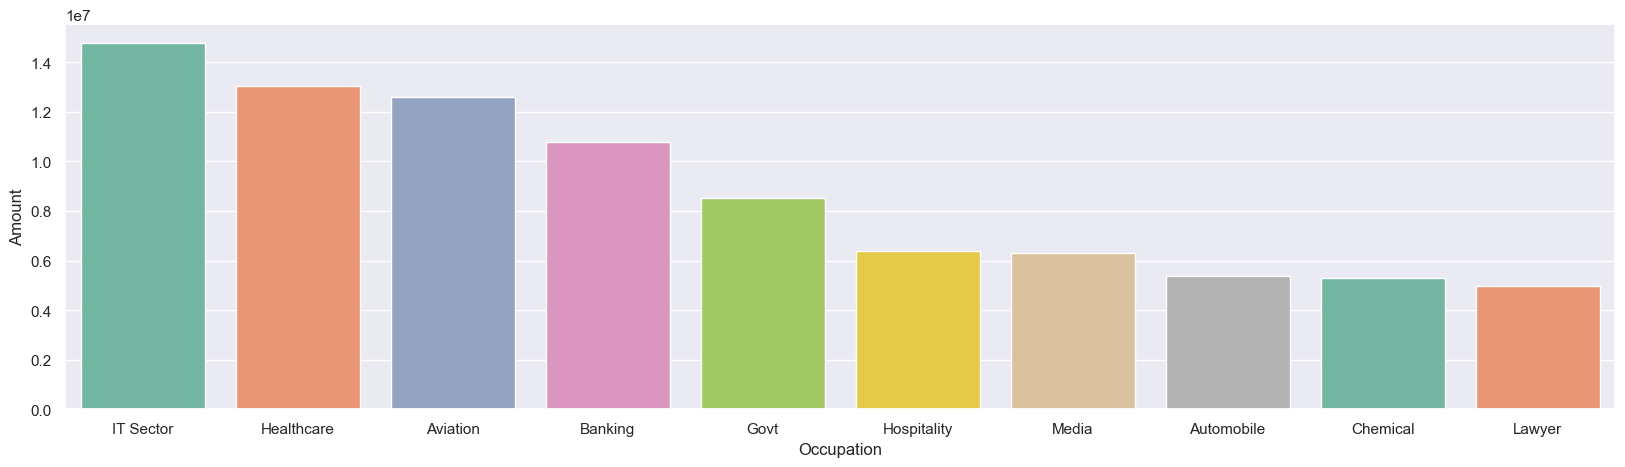

In [53]:
sales_occu=df2.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_occu,x='Occupation',y='Amount',palette='Set2')

# product_category

In [40]:
df2.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

C:\Users\manee\AppData\Local\Temp\ipykernel_10756\1895033562.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Product_Category',data=df2,palette='Set2')


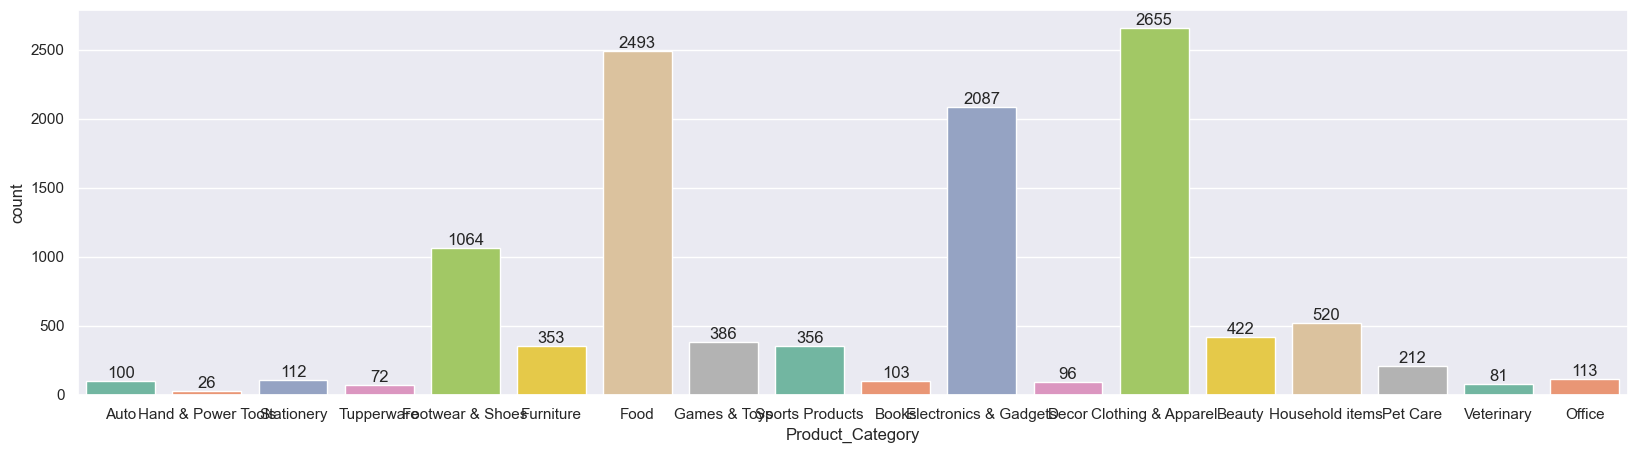

In [45]:
ax=sns.countplot(x='Product_Category',data=df2,palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\manee\AppData\Local\Temp\ipykernel_10756\571767261.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Category',y='Amount',data=sales_category,palette='Set2')


<Axes: xlabel='Product_Category', ylabel='Amount'>

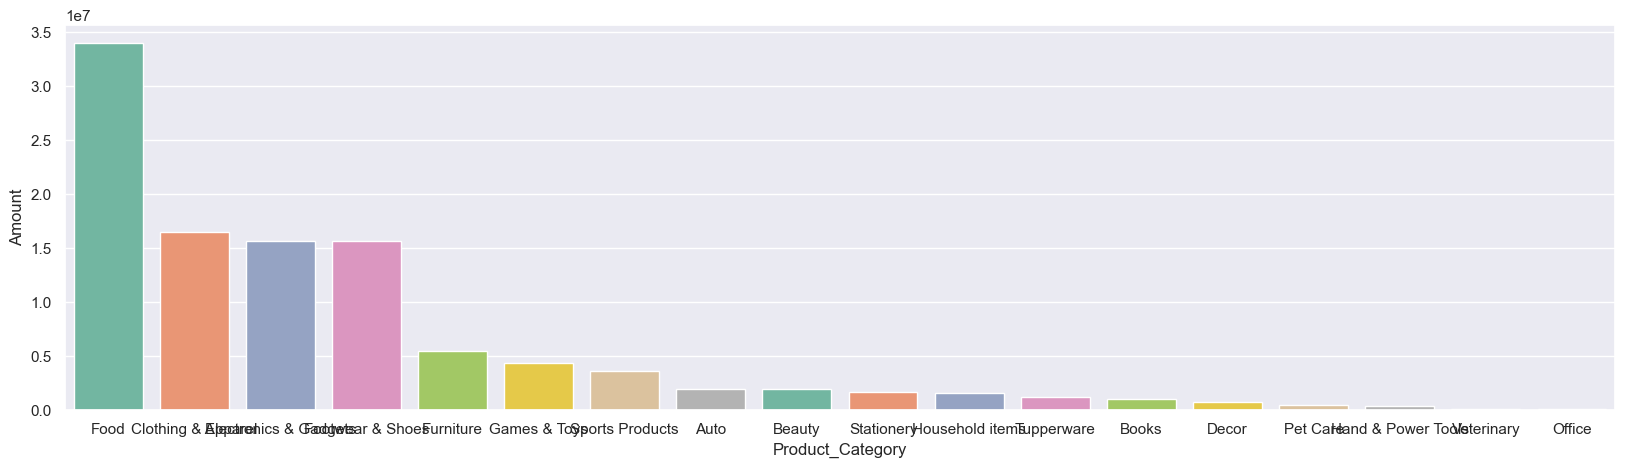

In [44]:
sales_category=df2.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_Category',y='Amount',data=sales_category,palette='Set2')

C:\Users\manee\AppData\Local\Temp\ipykernel_10756\2994941122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Category',y='Orders',data=sales_category,palette='Set2')


<Axes: xlabel='Product_Category', ylabel='Orders'>

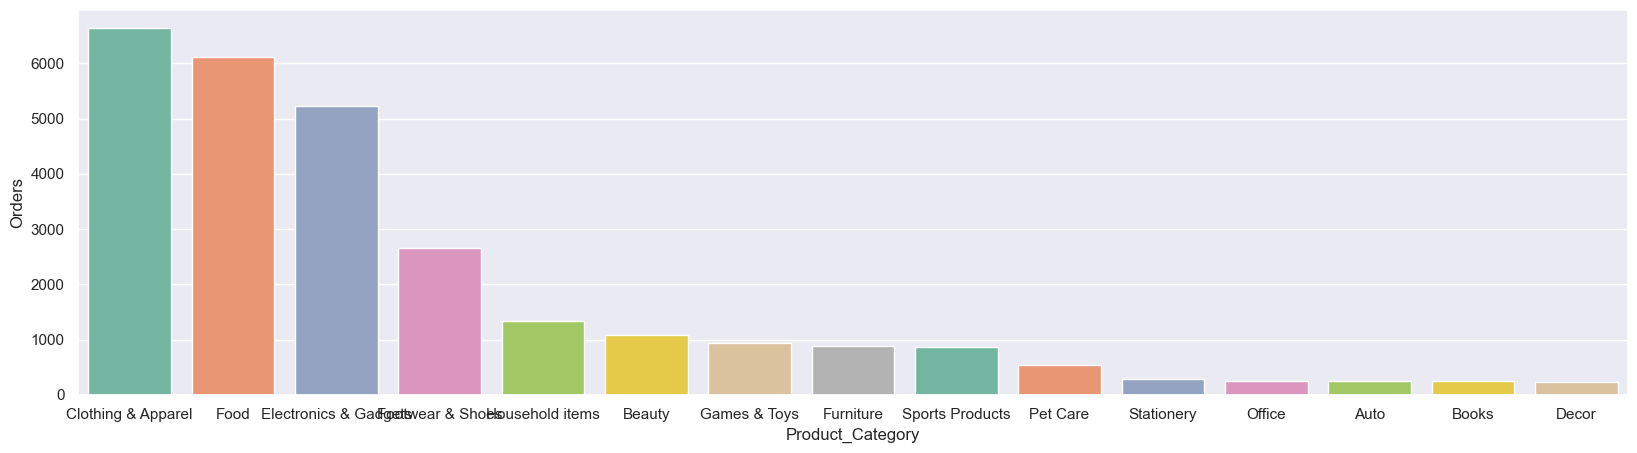

In [58]:
sales_category=df2.groupby(['Product_Category'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(15)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_Category',y='Orders',data=sales_category,palette='Set2')

C:\Users\manee\AppData\Local\Temp\ipykernel_10756\3671332896.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_ID',y='Orders',data=sales_productid,palette='Set2')


<Axes: xlabel='Product_ID', ylabel='Orders'>

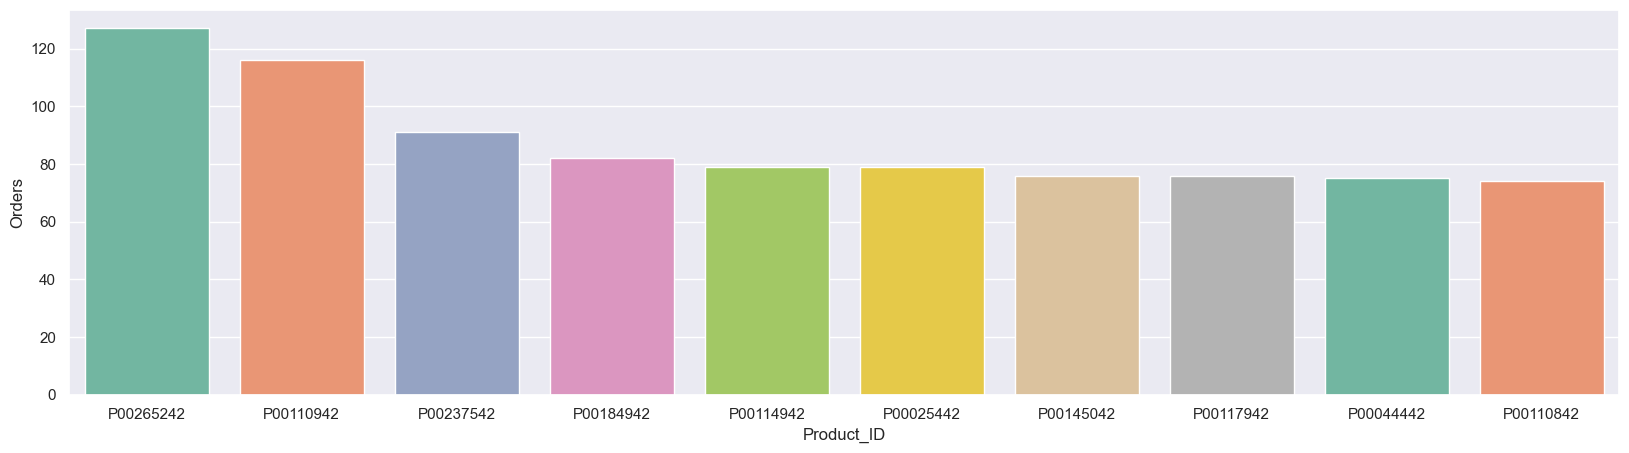

In [61]:
# product id with orders 

sales_productid=df2.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_ID',y='Orders',data=sales_productid,palette='Set2')

C:\Users\manee\AppData\Local\Temp\ipykernel_10756\4277687465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Product_ID',data=df2.head(10),palette='Set2')


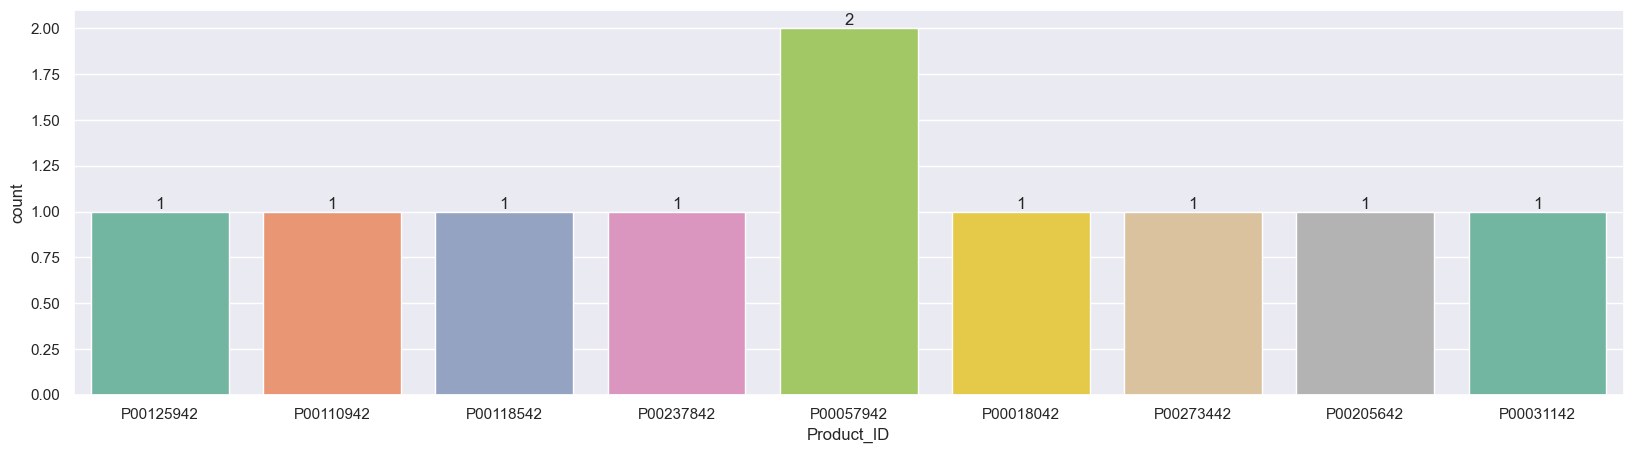

In [65]:
#sales_productid=df2.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
ax=sns.countplot(x='Product_ID',data=df2.head(10),palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\manee\AppData\Local\Temp\ipykernel_10756\3277876987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Product_ID',y='Amount',data=sales_productid,palette='Set2')


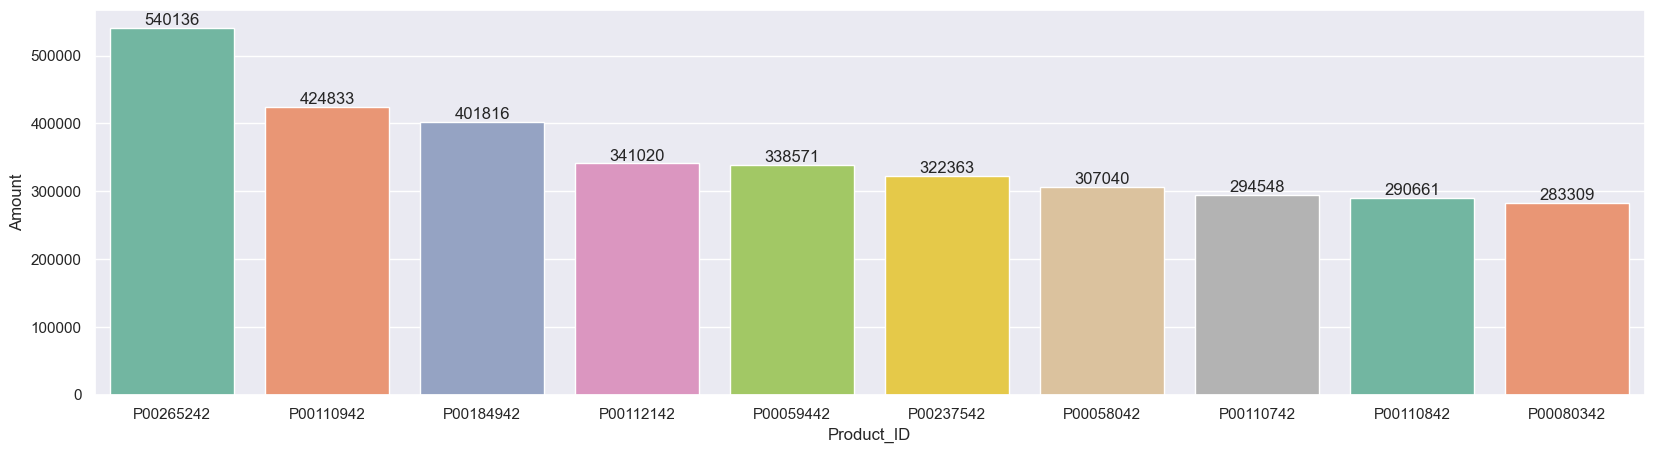

In [67]:
sales_productid=df2.groupby(['Product_ID'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.barplot(x='Product_ID',y='Amount',data=sales_productid,palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)